# Clustering Resiko Terkena Obesitas/Masalah Jantung Menggunakan Algoritma K-Means
# 1. Impor Library yang diperlukan
Langkah pertama adalah mengimpor library yang diperlukan

In [8]:
# Impor Library Yang diperlukan
import pandas as pd #Load Dataset
import numpy as np  #Mengolah dan Manipulasi data
from sklearn.cluster import KMeans # Kmeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder #Scaling dan Normalisasi Data
from sklearn.decomposition import PCA  # Visualisasi Data Clustering
from sklearn.metrics import davies_bouldin_score # Evaluasi Model Clustering 
from sklearn.metrics import silhouette_score,silhouette_samples # Evaluasi Model Clustering
import matplotlib.pyplot as plt #Untuk Menampilkan Grafik
import matplotlib.cm as cm #Untuk Menampilkan Grafik
import warnings  # Mengabaikan warning yang tidak terlalu berarti
warnings.filterwarnings('ignore') # Mengabaikan warning yang tidak terlalu berarti


# 2. Load Dataset
Memuat dataset ke dalam lingkungan kerja menggunakan pandas. Ini bisa melibatkan membaca file CSV, Excel, atau sumber data lainnya

In [3]:
df = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Berikut adalah atribut atribut dalam dataset yang akan kita clustering :

1. **Gender** = Jenis Kelamin
1. **Age** = Umur
1. **Height** = Tinggi Badan
1. **Weight** = Berat Badan
1. **family_history_with_overweight** = Memiliki Keluarga yang berat badannya tinggi
1. **FAVC** = Frequent consumption of high caloric food / Frekuensi Mengonsumsi Makanan Berkalori Tinggi
1. **FCVC** = Frequency of consumption of vegetables / Frekuensi Konsumsi Sayur
1. **NCP** = Number of main meals / Berapa kali makan dalam sehari
1. **CAEC** = Consumption of food between meals / Konsumsi Cemilan(Nyemil)
1. **SMOKE** = Merokok
1. **CH2O** = Consumption of water daily / Jumlah Air yang diminum dalam sehari
1. **SCC** = Calories consumption monitoring / Pemantauan konsumsi kalori
1. **FAF** = Physical activity frequency / Frekuensi aktivitas fisik
1. **TUE** = Time using technology devices / Lama Waktu Menggunakan Perangkat Teknologi
1. **CALC** = Consumption of alcohol / Konsumsi Alkohol
1. **MTRANS** = Transportation used / Transportasi yang digunakan sehari hari
1. **NObeyesdad**  = Tingkat obesitas dikurangi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

# 3. Konversi Data Kategorikal Menjadi Numerik
Karena K-means bekerja dengan jarak Euclidean, data kategorikal harus diubah menjadi format numerik. Ini bisa dilakukan dengan teknik seperti Label Encoding atau One-Hot Encoding

In [13]:
selected_columns = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
X = df[selected_columns]

categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])
    
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


# 4. Normalisasi Data
Data numerik sering kali perlu dinormalisasi agar memiliki skala yang seragam. Ini penting karena K-means sensitif terhadap skala variabel. MinMaxScaler adalah salah satu metode untuk melakukan ini, mengubah data sehingga fitur-fiturnya berada dalam rentang [0, 1]

In [14]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.000000,0.5,1.000000,0.75,0.166667
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.666667,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75,0.166667
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.5,0.333333,0.75,0.166667
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.0,0.333333,1.00,0.833333
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.666667,0.0,0.5,0.0,0.000000,0.0,0.666667,0.75,1.000000


# 5. Metode Siku / Elbow Method
Untuk menentukan jumlah kluster yang optimal, metode elbow digunakan. Ini melibatkan plot dari jumlah kluster terhadap inersia (total jarak dalam kluster) dan mencari titik “siku” di mana peningkatan jumlah kluster tidak lagi memberikan penurunan inersia yang signifikan

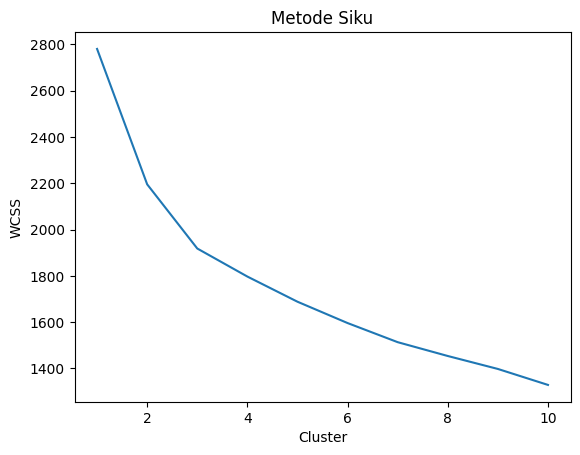

In [64]:
# Memilih Angka Optimal Untuk K (k)
# Menggunakan Metode Siku (Elbow Methode)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot 
plt.plot(range(1, 11), wcss)
plt.title('Metode Siku')
plt.xlabel('Cluster')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# 6. Pembuatan Model K-Means
Setelah data siap, model K-means diinisialisasi dan di-fit dengan data. Ini melibatkan pemilihan jumlah kluster dari metode siku dan iterasi algoritma untuk menemukan centroid

In [76]:
# Dari plot Metode Siku, Nilai yang akan saya ambil adalah 3
optimal_k = 3

# Melatih Model K-Means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

# 7. Visualisasi Data Hasil Klusterisasi
Setelah model di-fit, hasil klusterisasi dapat divisualisasikan menggunakan plot dua dimensi jika data telah direduksi, atau dengan teknik visualisasi multidimensi lainnya

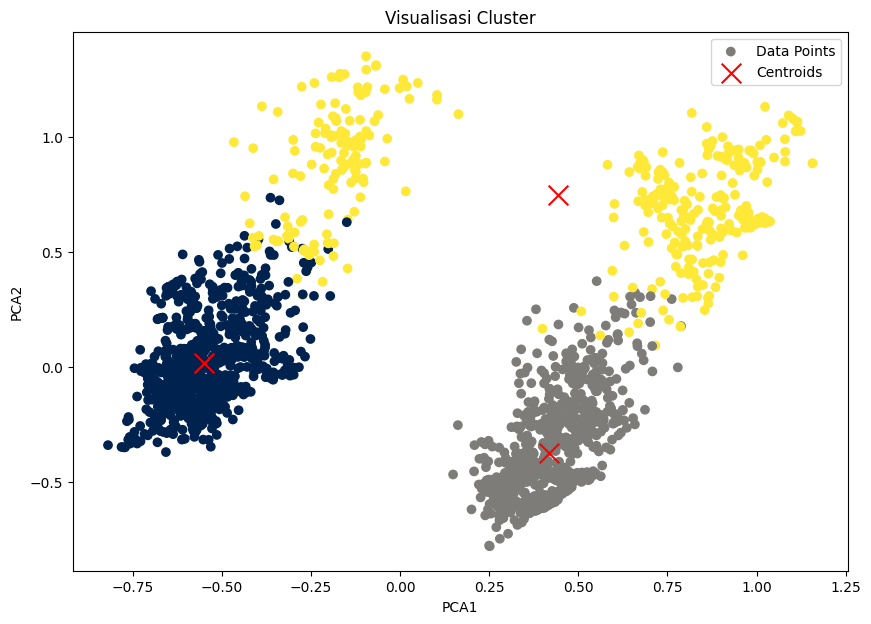

In [78]:
# Evaluasi model berdasarkan pengetahuan domain

# Inisialisasi dan transformasi PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

# Membuat plot untuk visualisasi kluster
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='cividis', marker='o', label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('Visualisasi Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# 8. Menampilkan Letak Centroid
Centroid dari setiap kluster, yang merupakan titik tengah dari kluster, dapat ditampilkan pada visualisasi untuk memberikan pemahaman tentang pusat setiap kluster

In [79]:
#Untuk Melihat dimana Letak Centroid Tiap Cluster
centroids = kmeans.cluster_centers_
print(centroids)


[[1.00000000e+00 2.34506536e-01 5.94374202e-01 4.11224372e-01
  9.94565217e-01 9.29347826e-01 6.37923788e-01 5.87445167e-01
  6.35144928e-01 2.60869565e-02 5.36706677e-01 1.84782609e-02
  3.82189395e-01 3.45678371e-01 7.60869565e-01 5.34510870e-01
  5.23369565e-01]
 [9.99200722e-16 2.32036972e-01 3.83771619e-01 3.88869288e-01
  1.00000000e+00 9.00123305e-01 7.98880529e-01 5.53343610e-01
  6.28853268e-01 1.72626387e-02 5.13306064e-01 3.69913687e-02
  2.67856353e-01 3.16778253e-01 7.58734073e-01 6.20530210e-01
  5.84052610e-01]
 [3.89473684e-01 1.55950869e-01 3.79927890e-01 1.47259368e-01
  3.44169138e-15 7.39473684e-01 6.92152520e-01 5.18181710e-01
  5.63157895e-01 1.57894737e-02 4.04985992e-01 1.28947368e-01
  3.73860699e-01 3.14332151e-01 7.39473684e-01 6.66447368e-01
  2.78508772e-01]]


# 9. Penambahan Kolom Resiko Terkena Penyakit Obesitas/Masalah jantung sebagai Label Cluster
Berdasarkan hasil klusterisasi, kolom baru yang menunjukkan tingkat risiko (rendah, sedang, tinggi) ditambahkan ke dataset. Ini memberikan interpretasi yang lebih mudah dari hasil klusterisasi

In [62]:
df['Resiko Terkena(Cluster Label)'] = df['cluster'].replace([0,1,2],['Rendah','Sedang','Tinggi'])

# 10. Menampilkan Dataset Baru Setelah Klusterisasi
Dataset yang telah diperbarui dengan informasi kluster dan tingkat risiko kemudian ditampilkan untuk analisis lebih lanjut atau tindakan berikutnya

In [85]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,cluster,Resiko Terkena(Cluster Label)
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1,Sedang
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1,Sedang
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0,Rendah
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2,Tinggi
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,2,Tinggi


# 11. Evaluasi Model Clustering 
Model kluster dievaluasi menggunakan metrik seperti Silhouette Score, yang mengukur seberapa baik objek cocok dengan kluster mereka sendiri dibandingkan dengan kluster lain, dan Davies-Bouldin Index, yang merupakan rasio antara jarak dalam kluster dan jarak antar kluster

Untuk n_cluster = 2, rata rata nilai silhouette nya : 0.22038949134469873
Untuk n_cluster = 3, rata rata nilai silhouette nya : 0.2269439118072741
Untuk n_cluster = 4, rata rata nilai silhouette nya : 0.1970094868805066
Untuk n_cluster = 5, rata rata nilai silhouette nya : 0.2058522036476696
Untuk n_cluster = 6, rata rata nilai silhouette nya : 0.19231256418812465
Untuk n_cluster = 7, rata rata nilai silhouette nya : 0.17410932828478715
Untuk n_cluster = 8, rata rata nilai silhouette nya : 0.1761206834612192
Untuk n_cluster = 9, rata rata nilai silhouette nya : 0.191907409509354


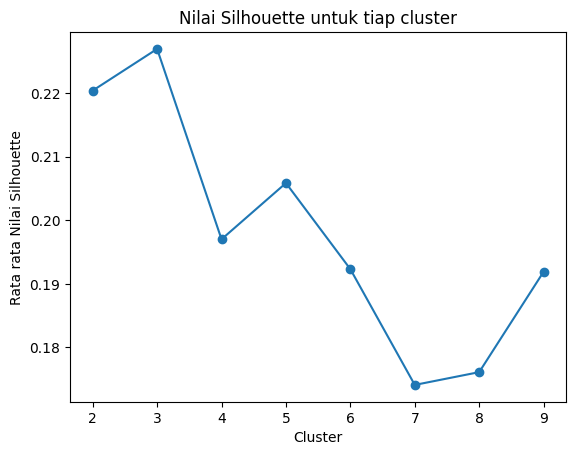

In [86]:
# Evaluasi Model Cluster dengan Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_avg_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"Untuk n_cluster = {n_clusters}, rata rata nilai silhouette nya : {silhouette_avg}")

# Plot silhouette score
plt.figure()
plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
plt.title('Nilai Silhouette untuk tiap cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata rata Nilai Silhouette')
plt.show()

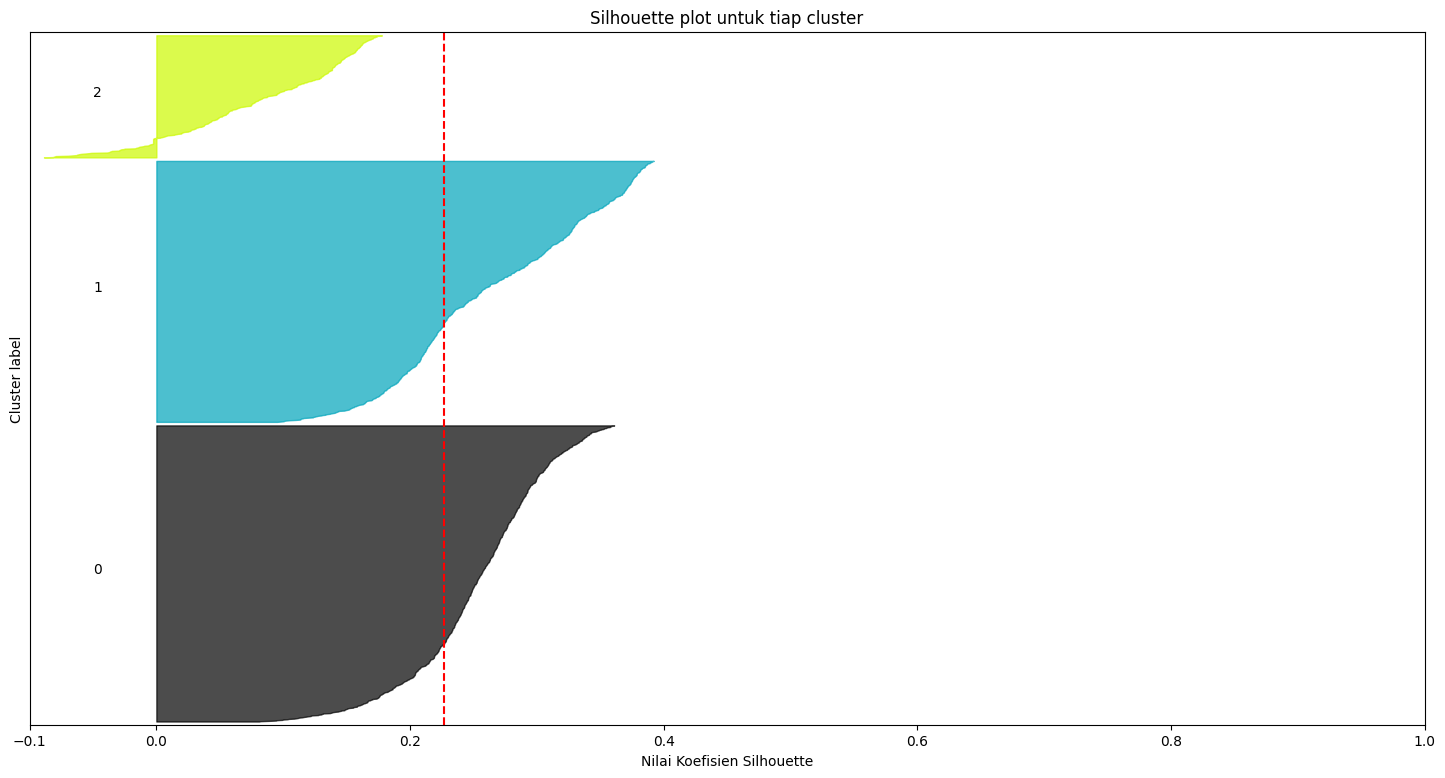

In [77]:
sample_silhouette_values = silhouette_samples(X_scaled, clusters)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 9)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scaled) + (optimal_k + 1) * 10])

y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[clusters == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10 

ax1.set_title("Silhouette plot untuk tiap cluster")
ax1.set_xlabel("Nilai Koefisien Silhouette")
ax1.set_ylabel("Cluster label")

silhouette_avg = silhouette_score(X_scaled, clusters)
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([]) 
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()


Untuk n_clusters = 2, nilai DBI adalah: 1.848742452892485
Untuk n_clusters = 3, nilai DBI adalah: 1.6773188235981298
Untuk n_clusters = 4, nilai DBI adalah: 1.8658815864351639
Untuk n_clusters = 5, nilai DBI adalah: 1.8449447872063574
Untuk n_clusters = 6, nilai DBI adalah: 2.0472468576788283
Untuk n_clusters = 7, nilai DBI adalah: 2.1202394263492303
Untuk n_clusters = 8, nilai DBI adalah: 1.956536394595798
Untuk n_clusters = 9, nilai DBI adalah: 1.9421321342767013


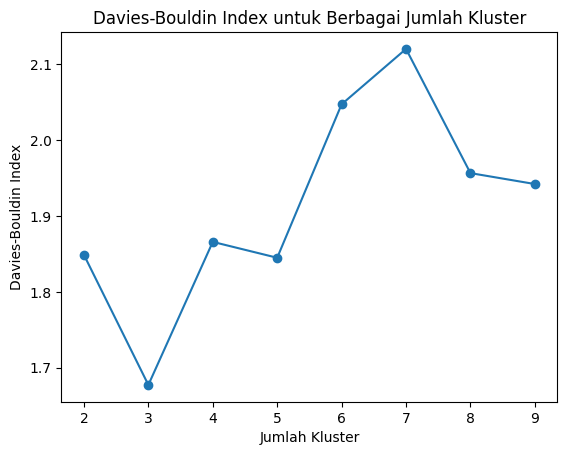

In [51]:

# Anggap 'X_scaled' adalah data yang telah dinormalisasi dan siap untuk clustering
# 'range_n_clusters' adalah rentang jumlah kluster yang ingin Anda evaluasi
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
dbi_scores = []

for n_clusters in range_n_clusters:
    # Inisialisasi model KMeans dengan jumlah kluster yang ditentukan
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Lakukan fitting model dan prediksi kluster
    clusters = kmeans.fit_predict(X_scaled)
    # Hitung DBI untuk kluster yang dihasilkan
    dbi = davies_bouldin_score(X_scaled, clusters)
    dbi_scores.append(dbi)
    print(f"Untuk n_clusters = {n_clusters}, nilai DBI adalah: {dbi}")

# Plot DBI scores
plt.figure()
plt.plot(range_n_clusters, dbi_scores, marker='o')
plt.title('Davies-Bouldin Index untuk Berbagai Jumlah Kluster')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Davies-Bouldin Index')
plt.show()


Nilai Silhouette Score dan Davies-Bouldin Index (DBI) memang memberikan indikasi tentang kualitas pemodelan clustering. Namun, penting untuk memahami bahwa nilai-nilai ini harus ditafsirkan dalam konteks dataset dan tujuan analisis.

**Silhouette Score:**
- Nilai Silhouette berkisar antara -1 hingga 1.
- Nilai mendekati 1 menunjukkan bahwa sampel berada jauh dari kluster tetangga.
- Nilai mendekati 0 menunjukkan bahwa sampel berada dekat dengan batas keputusan antara dua kluster yang berdekatan.
- Nilai negatif menunjukkan bahwa sampel mungkin telah ditempatkan di kluster yang salah.

Dalam pemodelan ini, nilai Silhouette 0.226 menunjukkan bahwa kluster tidak tumpang tindih secara signifikan, tetapi masih ada ruang untuk peningkatan. Ini bukan nilai yang buruk, tetapi juga tidak menunjukkan pemisahan yang sangat baik antara kluster.

**Davies-Bouldin Index:**
- DBI mengukur rata-rata 'kesamaan' antara setiap kluster dengan kluster yang paling mirip.
- Nilai yang lebih rendah menunjukkan pembagian kluster yang lebih baik.
- Tidak ada batas atas yang jelas untuk DBI, tetapi nilai yang lebih dekat dengan 0 biasanya dianggap lebih baik.

Nilai DBI 1.67 menunjukkan bahwa kluster mungkin tidak terdefinisi dengan baik atau memiliki variasi internal yang signifikan. Ini bisa menunjukkan bahwa model clustering tidak optimal atau bahwa data tidak terpisah dengan jelas menjadi kluster yang berbeda.

**Kesimpulan:**
Nilai evaluasi yang tidak optimal tidak selalu menandakan pemodelan clustering yang buruk; ini bisa juga berarti bahwa data itu sendiri tidak terstruktur dengan jelas ke dalam kluster yang terpisah atau bahwa parameter model mungkin perlu disesuaikan. Dalam praktiknya, evaluasi ini harus digunakan bersama dengan pengetahuan domain dan analisis eksplorasi data untuk menentukan apakah model clustering memenuhi kebutuhan analisis.